In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

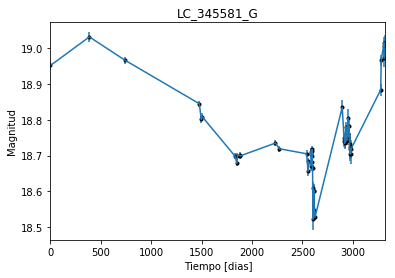

In [2]:
data = np.genfromtxt('LC_345581_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_345581_G')
plt.savefig("LC_345581_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

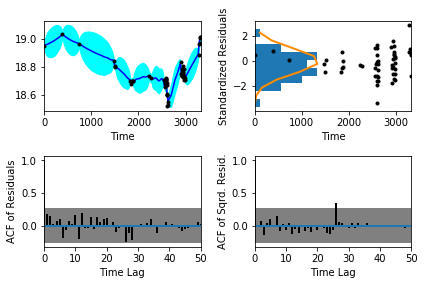

In [5]:
sample.assess_fit()

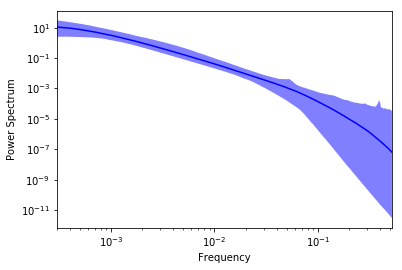

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

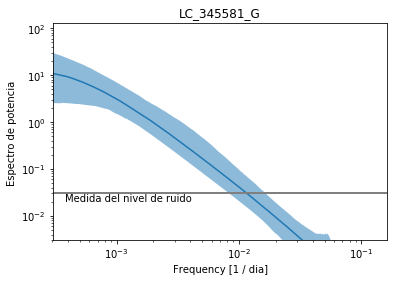

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_345581_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_345581_G')

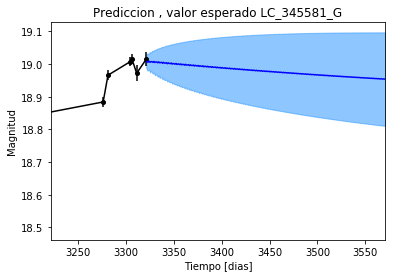

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_345581_G')

Text(0.5,1,'Prediccion, Caminos simulados_LC_345581_G')

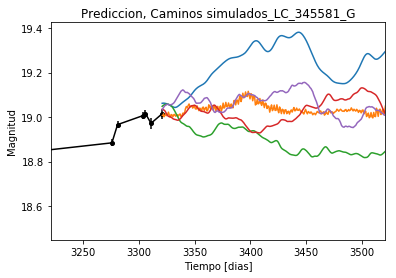

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_345581_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


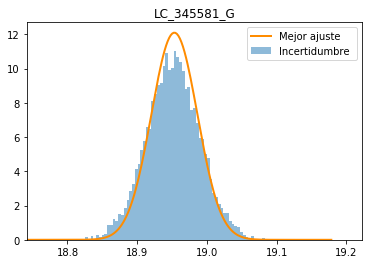

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_345581_G')
plt.savefig("Mejor_ajuste_LC_345581_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_345581_G')

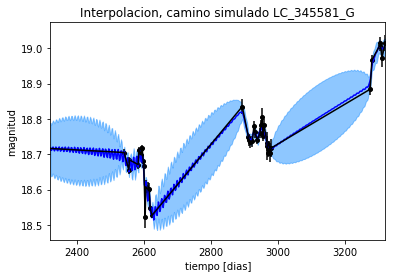

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_345581_G')

Text(0.5,1,'Interpolacion, camino simulado LC_345581_G')

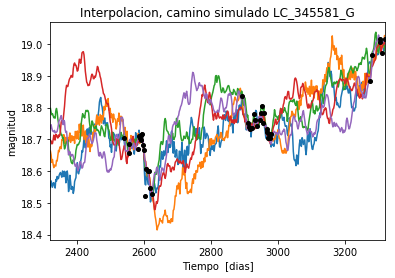

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_345581_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 375.794446217
Median: 0.0500894609655
Standard deviation: 0.229456991238
68% credibility interval: [ 0.00476177  0.32965427]
95% credibility interval: [  6.40098537e-04   8.78015298e-01]
99% credibility interval: [  3.59375559e-04   9.96336755e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 274.21499584
Median: 0.0263504765523
Standard deviation: 0.150233906517
68% credibility interval: [ 0.00139598  0.1508341 ]
95% credibility interval: [  3.64415858e-04   5.82821591e-01]
99% credibility interval: [  3.13104044e-04   9.11813118e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 374.610027267
Median: 0.106444420918
Sta

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1141.63988777
Median: 117.941504815
Standard deviation: 1.71711267622
68% credibility interval: [ 116.02126452  119.15123085]
95% credibility interval: [ 113.36644401  119.88950839]
99% credibility interval: [ 111.30568539  120.24706227]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 430.036296685
Median: 1.74826265085
Standard deviation: 3.08015757338
68% credibility interval: [ 0.4052195   6.28441681]
95% credibility interval: [  0.14262099  10.64530874]
99% credibility interval: [  0.06670837  14.98934556]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 349.453386083
Median: 6.34438182912
Standard deviation: 15.5085168122
68% credibility interval: [  0.76713165  26.66639229]
95% credibility interval: [  0.1210293

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 14914.4503087
Median: 3.35589393107e-40
Standard deviation: 5.80072283214e+83
68% credibility interval: [  6.61791340e-74   1.67702980e-14]
95% credibility interval: [  3.23364365e-110   4.88789158e+034]
99% credibility interval: [  5.01375650e-129   3.36699504e+061]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2225.50025943
Median: 18.8501215417
Standard deviation: 0.0723921313425
68% credibility interval: [ 18.78583869  18.91889868]
95% credibility interval: [ 18.71572113  19.0074439 ]
99% credibility interval: [ 18.66478667  19.07795164]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 563.338855494
Median: 0.207389312296
Standard deviation: 0.315547166701
68% credibility interval: [ 0.         0.7163204]
95% credibility interval: [ 0.          0.99551524]
99% credibility interval: [ 0.          1.03722569]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 563.338855494
Median: 0.207389312296
Standard deviation: 0.315547166701
68% credibility interval: [ 0.         0.7163204]
95% credibility interval: [ 0.          0.99551524]
99% credibility interval: [ 0.          1.03722569]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 3770.76246815
Median: 0.0
Standard deviation: 0.000235053690619
68% credibil

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1141.63988777
Median: 117.941504815
Standard deviation: 1.71711267622
68% credibility interval: [ 116.02126452  119.15123085]
95% credibility interval: [ 113.36644401  119.88950839]
99% credibility interval: [ 111.30568539  120.24706227]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2106.22422783
Median: 0.0245173171879
Standard deviation: 0.0124656791831
68% credibility interval: [ 0.01601741  0.03749168]
95% credibility interval: [ 0.01143386  0.05709913]
99% credibility interval: [ 0.00922023  0.07914464]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1761.68217449
Median: 1.1754856926
Standard deviation: 0.231534786169
68% credibility interval: [ 0.97820257  1.43282385]
95% credibility interval: [ 0.82341209  1.73147814]
99% credibility interval: [ 0.72193132  1.91113354]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 307.142429939
Median: 0.0309169592669
Standard deviation: 0.389985648632
68% credibility interval: [ 0.00182735  0.23113357]
95% credibility interval: [  4.85401487e-38   1.29088731e+00]
99% credibility interval: [  3.93698410e-64   2.75004740e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 375.794446217
Median: (-0.314721365183-5.30159135997j)
Standard deviation: 2.45141295245
68% credibility interval: [-2.07127888-5.26850206j -0.02991909-3.27333115j]
95% credibility interval: [ -5.51673282e+00-5.54761854j  -4.02185772e-03-4.9671553j ]
99% credibility interval: [ -6.26016846e+00+0.j         -2.25802323e-03-5.4034402j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 274.21499584
Median: (-0.165564927111+1.80943385695j)
Standard deviation: 2.19588329464
68% credibility interval: [-0.94771859+1.39450907j -0.00877119+0.j        ]
95% credibility interval: [ -3.66197606e+00+5.08073175j  -2.28969237e-03+6.41616732j]
99% credibility interval: [ -5.72909079e+00+5.46876215j  -1.96729073e-03+0.j        ]
Posterior